In [1]:
#objective 

To develop a machine learning classification model that accurately predicts whether a bank customer will subscribe to a term deposit using historical data from telemarketing campaigns

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix


In [3]:
#load dataset 

In [2]:
df = pd.read_excel('Banking_Call_Data.xlsx')

In [3]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
#Dataset Overview

In [4]:
df.shape

(45211, 17)

In [5]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
print(df.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [8]:
df .columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [11]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [12]:
#Exploratory Data Analysis (EDA)  

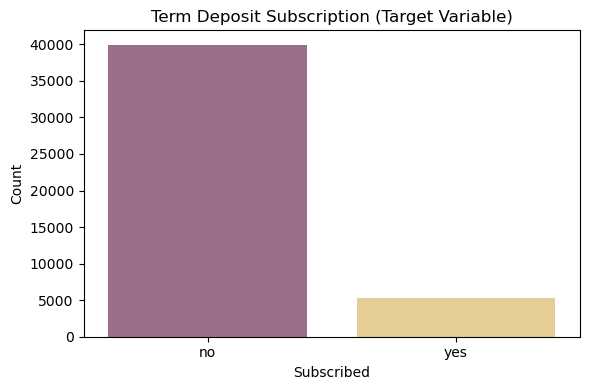

In [9]:
plt.figure(figsize=(6, 4))
sns.countplot(
    x='y',
    data=df,
    palette=['#A2678A', '#F2D388']  # dirty purple & muted yellow
)
plt.title('Term Deposit Subscription (Target Variable)', fontsize=12)
plt.xlabel('Subscribed', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.tight_layout()
plt.show()


In [28]:
# Percentage of classes

In [10]:
print("\nTarget Class Distribution (%):")
print(df['y'].value_counts(normalize=True) * 100)


Target Class Distribution (%):
y
no     88.30152
yes    11.69848
Name: proportion, dtype: float64


In [12]:
# Overview of categorical columns

In [11]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()
print("\nCategorical Columns:", categorical_cols)


Categorical Columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']


In [12]:
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


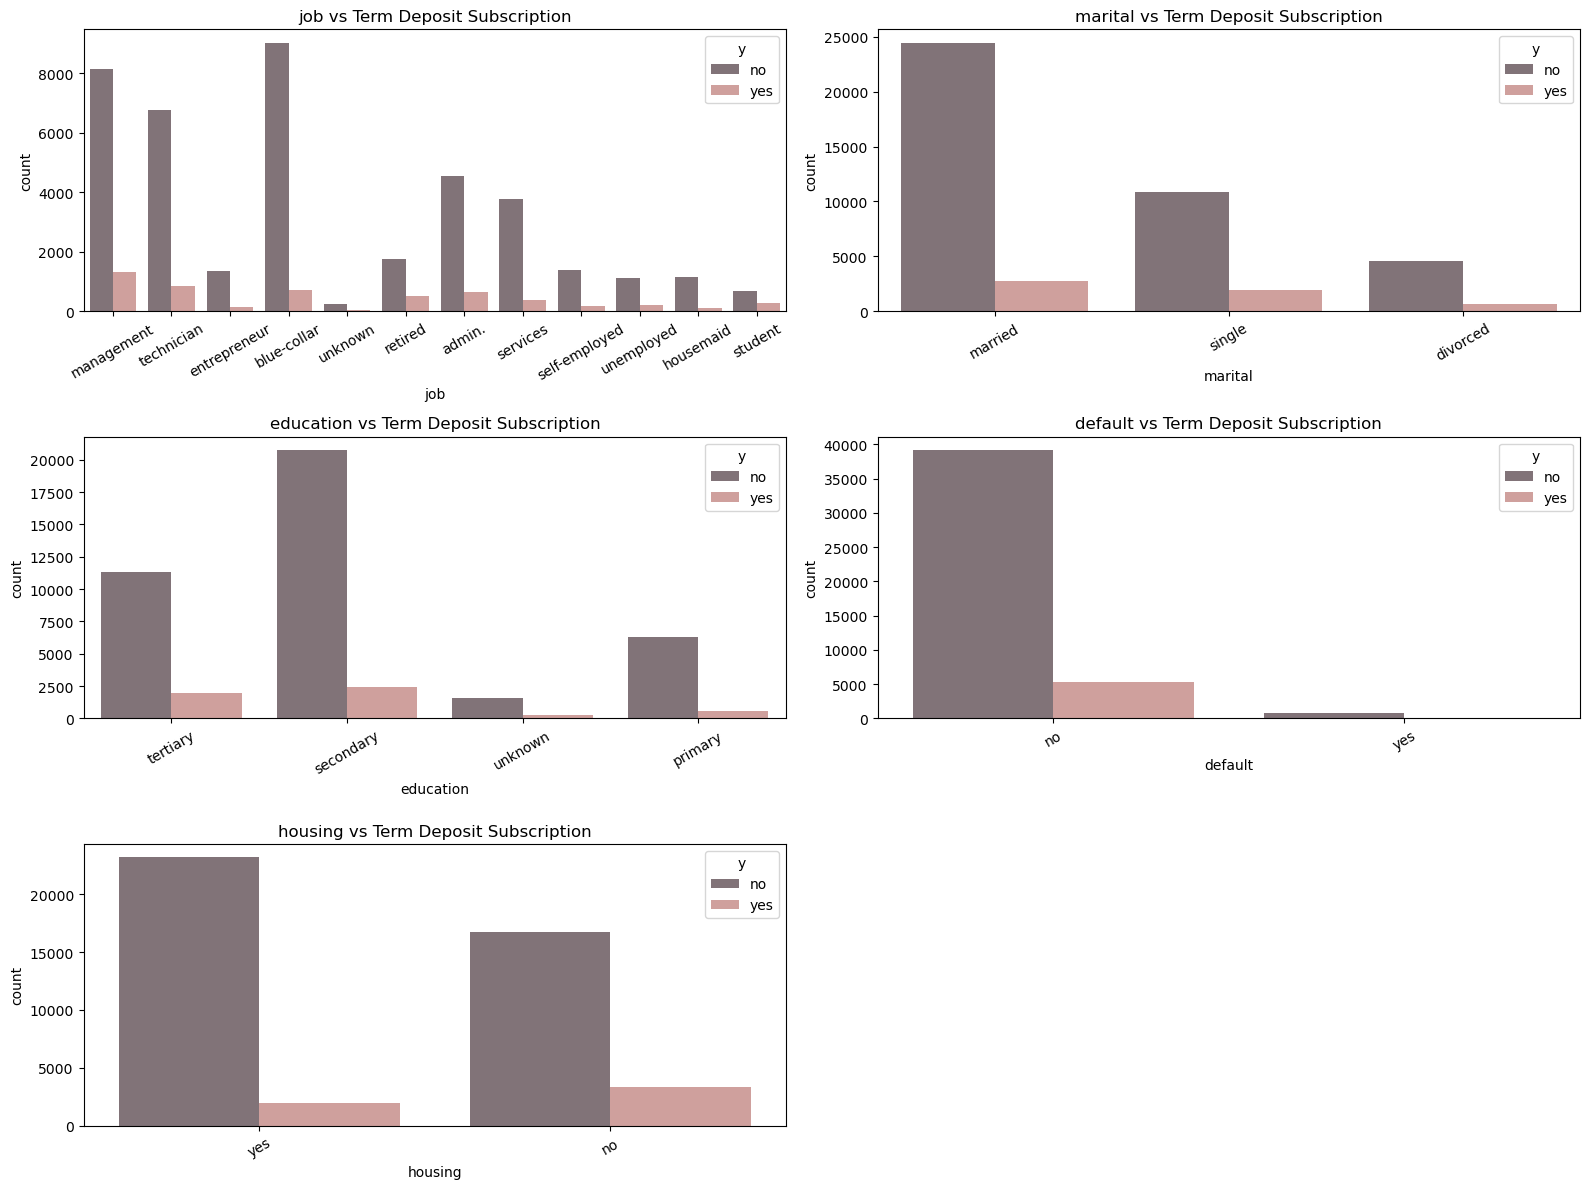

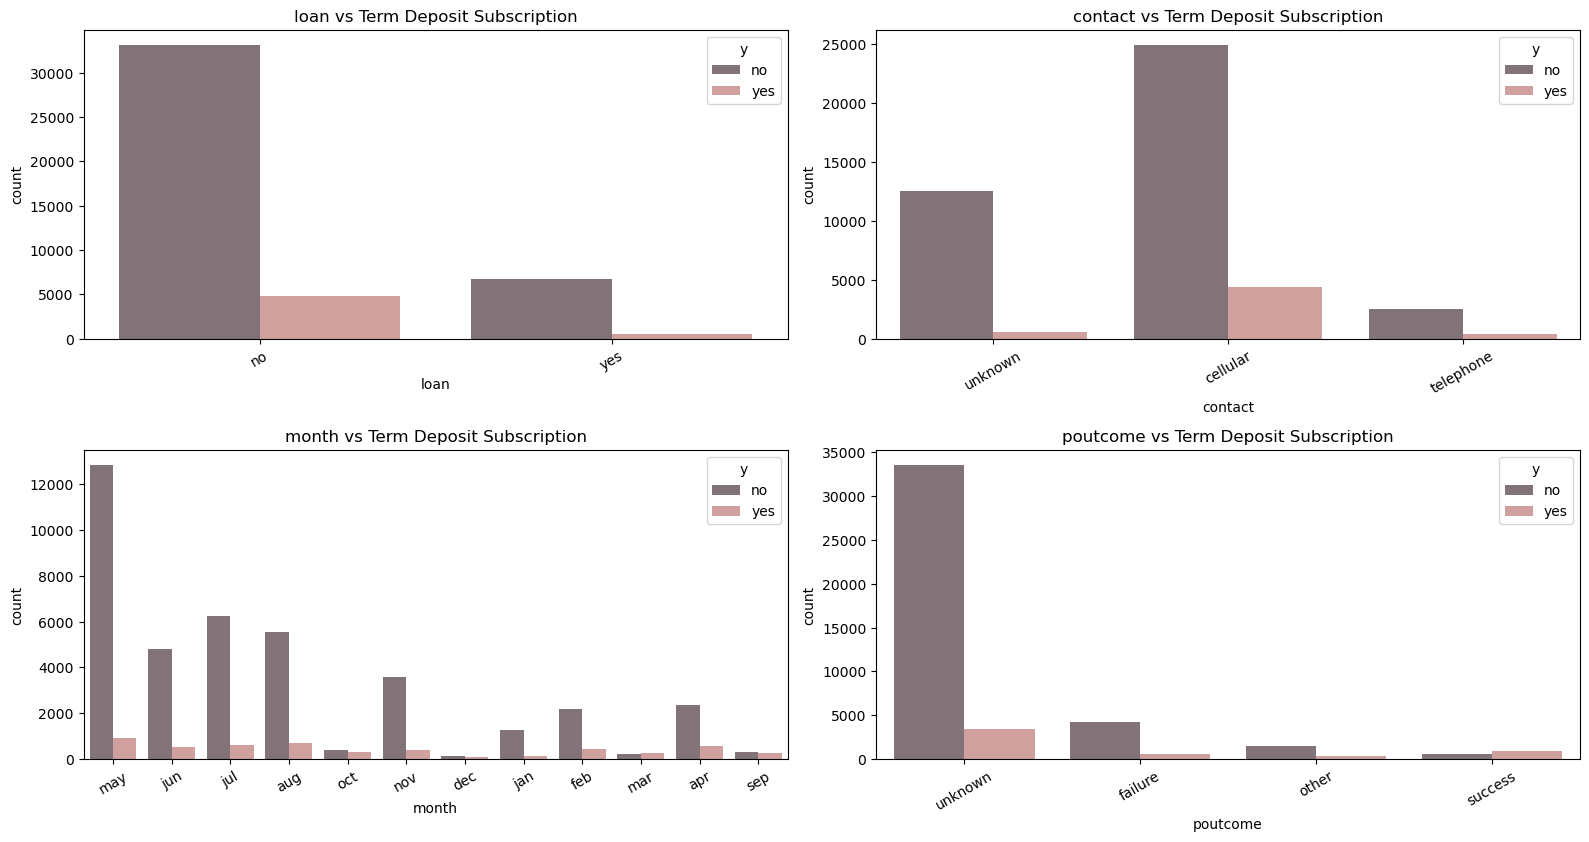

In [13]:
# Plot 5 at a time instead of all 10 (compact and neat!)
for j in range(0, len(categorical_cols), 5):
    plt.figure(figsize=(16, 12))
    for i, col in enumerate(categorical_cols[j:j+5], 1):
        plt.subplot(3, 2, i)
        sns.countplot(data=df, x=col, hue='y', palette={'no': '#837177', 'yes': '#D79995'})
        plt.title(f'{col} vs Term Deposit Subscription')
        plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()


In [13]:
#Numerical Analysis + Outlier Detection

In [14]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Numerical Columns:", numerical_cols)

Numerical Columns: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [16]:
colors = ['#D8A39D', '#C08E8E', '#A47474', '#AF8C8C', '#D6B2A8', '#D8A39D', '#C08E8E', '#AF8C8C', '#B08484']


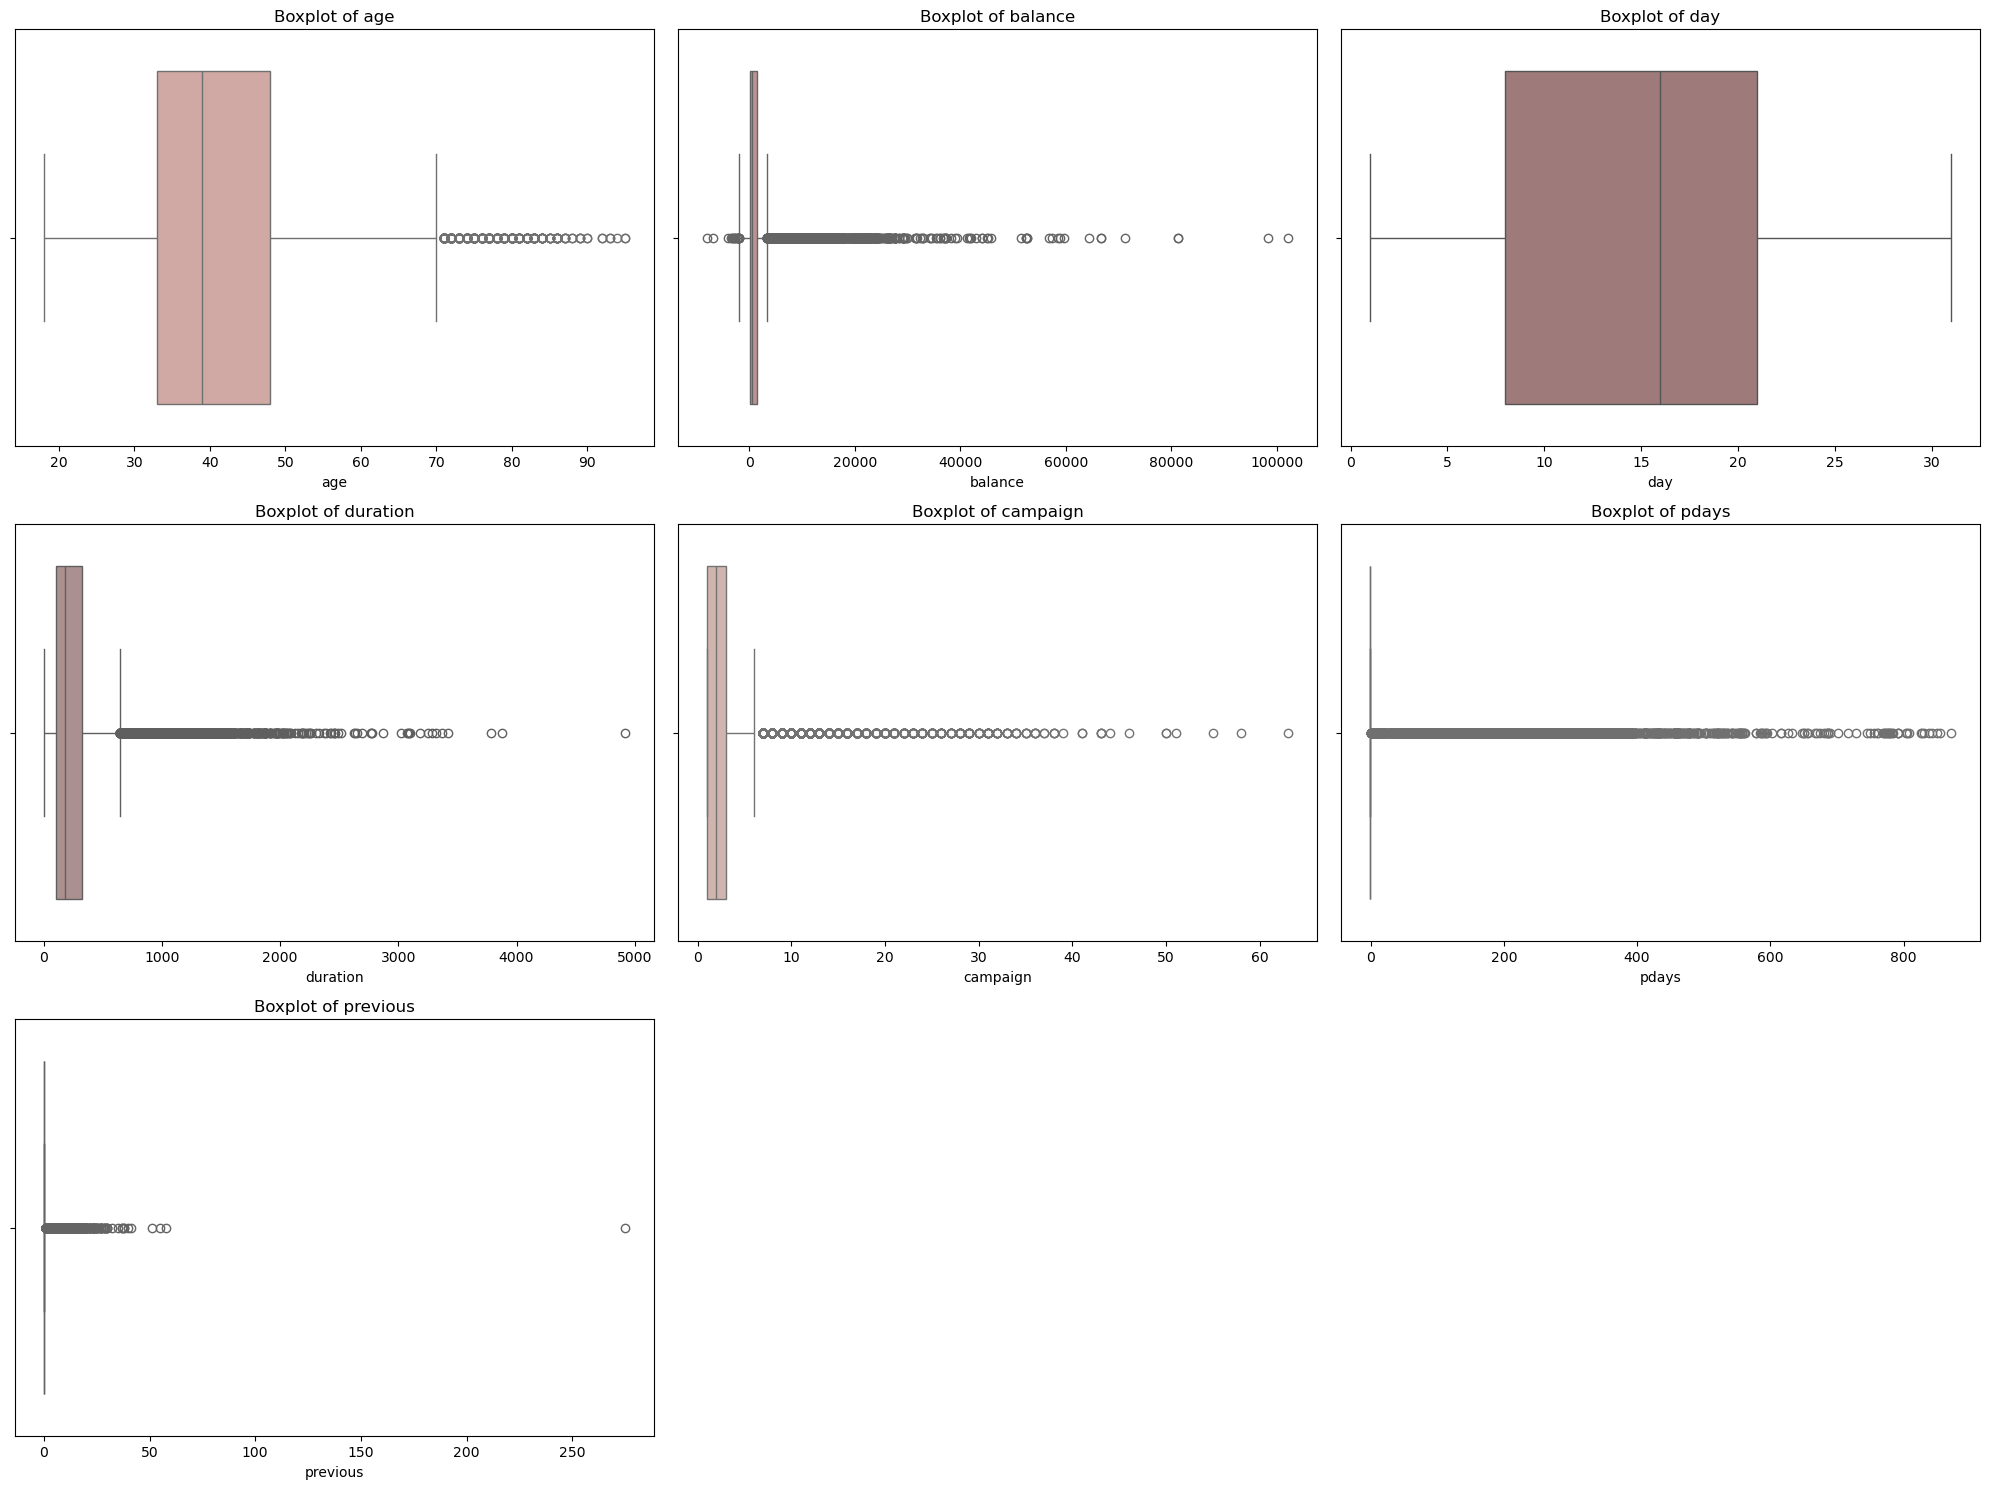

In [17]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, x=col, color=colors[i-1])  
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


In [19]:
df[numerical_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [20]:
#Significant outliers found in `balance`, `duration`, `campaign`, `pdays`, `previous`
#Most customers have low values for `campaign` and `previous`, but extreme outliers exist
#`duration` is skewed but highly valuable — not to be removed
#Will handle outliers during preprocessing using scaling or transformations


In [76]:
#Correlation Analysis  

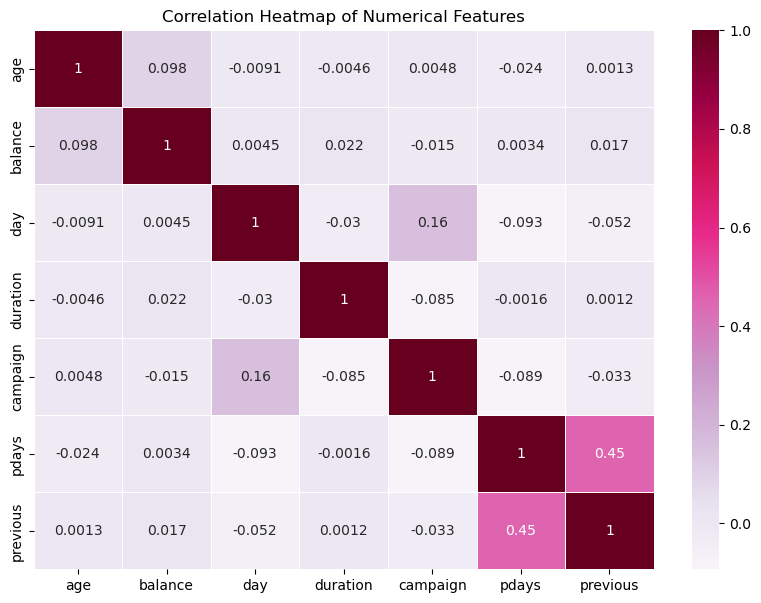

In [90]:
plt.figure(figsize=(10, 7))
sns.heatmap(
    df.select_dtypes(include=['int64', 'float64']).corr(),
    annot=True,
    cmap='PuRd',        
    linewidths=0.5
)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


In [19]:
#Feature vs Target Insight (for categorical):


In [18]:
for col in ['job', 'marital', 'education', 'contact', 'month', 'poutcome']:
    print(f"\n Subscription Rate by {col}:\n")
    print(df.groupby(col)['y'].value_counts(normalize=True).unstack() * 100)


 Subscription Rate by job:

y                     no        yes
job                                
admin.         87.797331  12.202669
blue-collar    92.725031   7.274969
entrepreneur   91.728312   8.271688
housemaid      91.209677   8.790323
management     86.244449  13.755551
retired        77.208481  22.791519
self-employed  88.157061  11.842939
services       91.116996   8.883004
student        71.321962  28.678038
technician     88.943004  11.056996
unemployed     84.497314  15.502686
unknown        88.194444  11.805556

 Subscription Rate by marital:

y                no        yes
marital                       
divorced  88.054542  11.945458
married   89.876534  10.123466
single    85.050821  14.949179

 Subscription Rate by education:

y                 no        yes
education                      
primary    91.373522   8.626478
secondary  89.440565  10.559435
tertiary   84.993610  15.006390
unknown    86.429725  13.570275

 Subscription Rate by contact:

y                 n

In [25]:
#No strong correlation among numerical features — safe for modeling
#Subscription is more likely for:
#Students, Retired people
#Single individuals
#Tertiary education level
#Contact via Cellular
#Months like March, December, and October
#Past outcome = "success"


In [26]:
#Data Preprocessing  

In [19]:
data = df.copy()

In [20]:
data['y'] = data['y'].map({'yes': 1, 'no': 0})

In [21]:
binary_cols = ['default', 'housing', 'loan']
for col in binary_cols:
    data[col] = data[col].map({'yes': 1, 'no': 0})

In [22]:
data = pd.get_dummies(data, columns=['job', 'marital', 'education', 'contact', 'month', 'poutcome'], drop_first=True)

In [23]:
X = data.drop('y', axis=1)
y = data['y']

In [41]:
#Model Training  

In [24]:
scaler = StandardScaler()
X_scaled = X.copy()
num_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
X_scaled[num_cols] = scaler.fit_transform(X[num_cols])


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


In [26]:
print(f'Train shape: {X_train.shape}, Test shape: {X_test.shape}')

Train shape: (36168, 42), Test shape: (9043, 42)


In [27]:
models = {
    'Logistic Regression': LogisticRegression(class_weight='balanced'),
    'Decision Tree': DecisionTreeClassifier(class_weight='balanced', random_state=42),
    'Random Forest': RandomForestClassifier(class_weight='balanced', random_state=42)
}

In [28]:
for name, model in models.items():
    print(f"\n🔹 Model: {name}")
    model.fit(X_train, y_train)


🔹 Model: Logistic Regression

🔹 Model: Decision Tree

🔹 Model: Random Forest


In [29]:
 y_pred = model.predict(X_test)

In [30]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[7818  167]
 [ 705  353]]


In [46]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7985
           1       0.68      0.33      0.45      1058

    accuracy                           0.90      9043
   macro avg       0.80      0.66      0.70      9043
weighted avg       0.89      0.90      0.89      9043



In [47]:
#Tuning with SMOTE  

In [31]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [32]:
params = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [5, 10]
}

In [33]:
grid = GridSearchCV(RandomForestClassifier(random_state=42), params, cv=3, scoring='f1', n_jobs=-1)
grid.fit(X_res, y_res)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20], 'min_samples_split': [5, 10],
                         'n_estimators': [100, 200]},
             scoring='f1')

In [34]:
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

In [35]:
print(" Best Parameters:", grid.best_params_)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

 Best Parameters: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}

Confusion Matrix:
[[7254  731]
 [ 304  754]]


In [36]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.91      0.93      7985
           1       0.51      0.71      0.59      1058

    accuracy                           0.89      9043
   macro avg       0.73      0.81      0.76      9043
weighted avg       0.91      0.89      0.89      9043



In [37]:
xgb_model = XGBClassifier(scale_pos_weight=7, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_res, y_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [38]:
y_pred_xgb = xgb_model.predict(X_test)

In [39]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))

Confusion Matrix:
 [[6773 1212]
 [ 156  902]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.85      0.91      7985
           1       0.43      0.85      0.57      1058

    accuracy                           0.85      9043
   macro avg       0.70      0.85      0.74      9043
weighted avg       0.91      0.85      0.87      9043



In [64]:
#Used SMOTE to handle class imbalance
#Tuned Random Forest with GridSearchCV
#Best Params: max_depth=20, min_samples_split=5, n_estimators=200
#Huge improvement in recall for minority class ("yes"): 0.33 ➜ 0.71
#Final F1 for class 1 = 0.59 (vs 0.45 baseline)
#Model is now more balanced and useful for campaign targeting


In [44]:
#Feature Importance  

In [40]:
importances = best_model.feature_importances_
features = X_train.columns
feature_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_df = feature_df.sort_values(by='Importance', ascending=False)

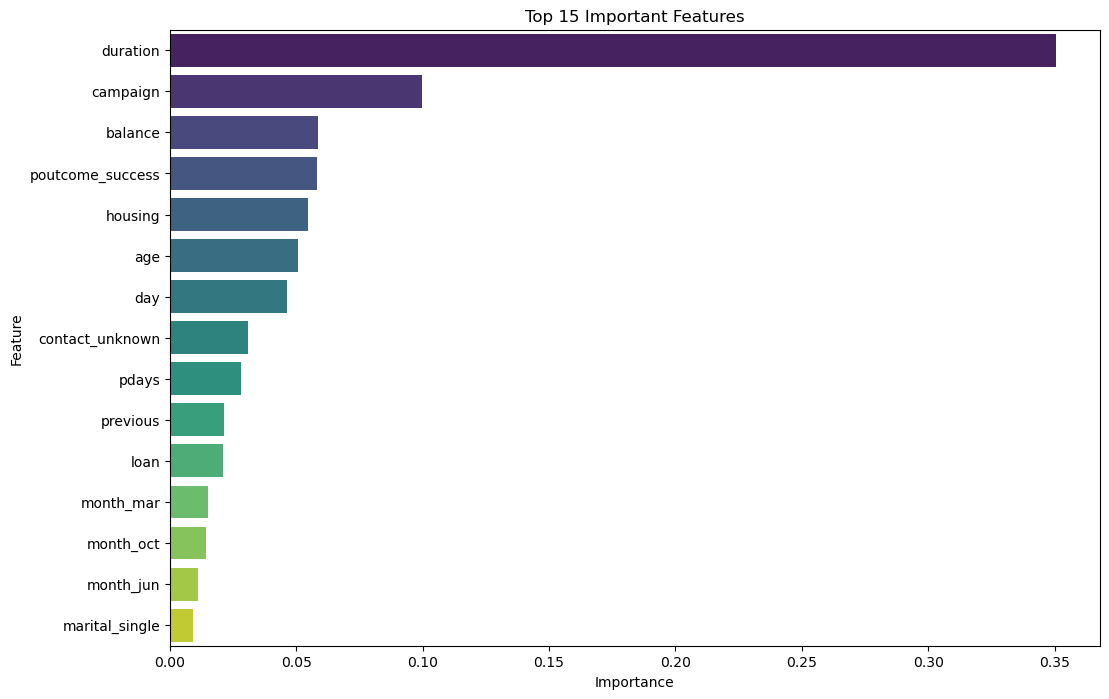

In [41]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_df.head(15), palette='viridis')
plt.title('Top 15 Important Features')
plt.show()

In [67]:
feature_df.head(15)

,Feature,Importance
6,duration,0.350416
7,campaign,0.099540
2,balance,0.058394
40,poutcome_success,0.058101
3,housing,0.054467
0,age,0.050627
5,day,0.046147
27,contact_unknown,0.031064
8,pdays,0.028024
9,previous,0.021476


In [42]:
models = {
    'Logistic Regression': LogisticRegression(class_weight='balanced', max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(class_weight='balanced', random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_split=5, class_weight='balanced', random_state=42),
    'XGBoost': XGBClassifier(scale_pos_weight=7, use_label_encoder=False, eval_metric='logloss', random_state=42)
}


In [43]:
results = {}

In [44]:
for name, model in models.items():
    model.fit(X_res, y_res)
    y_pred = model.predict(X_test)
    
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)
    }


In [45]:
results_df = pd.DataFrame(results).T.reset_index().rename(columns={'index': 'Model'})


In [46]:
display(results_df)

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.855468,0.429060,0.711720,0.535371
1,Decision Tree,0.859892,0.423778,0.549149,0.478386
2,Random Forest,0.885547,0.507744,0.712665,0.593000
3,XGBoost,0.848723,0.426679,0.852552,0.568726


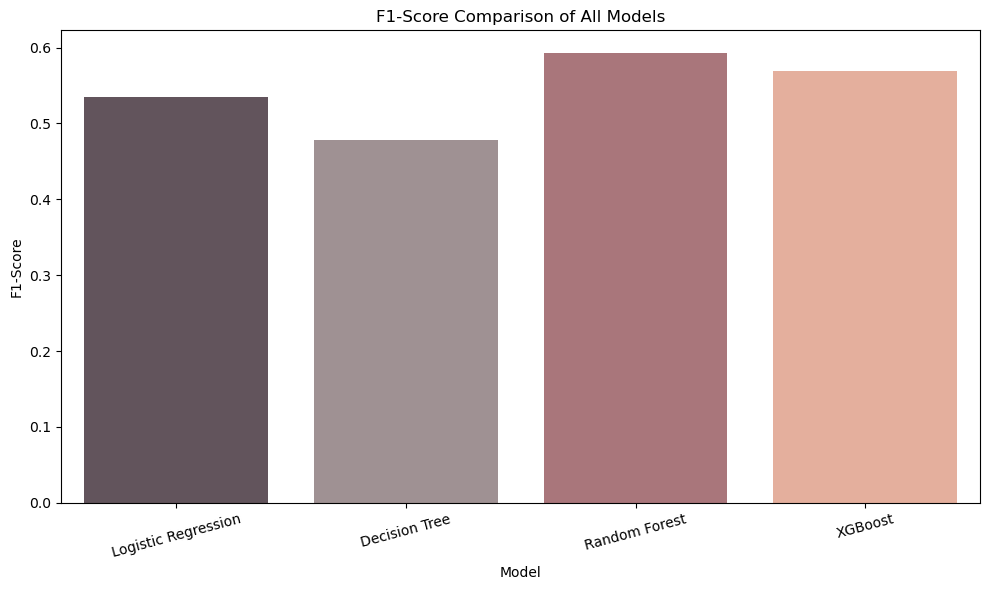

In [47]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Model',
    y='F1-Score',
    data=results_df,
    palette=['#65515D', '#A18F91', '#B16E74', '#F0A991'] 
)
plt.title('F1-Score Comparison of All Models')
plt.ylabel('F1-Score')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


## Conclusion

- I built a classification model to predict whether a customer will subscribe to a term deposit using telemarketing data.
- I performed detailed EDA and found that features like `job`, `education`, `contact`, `month`, and `poutcome` had a strong impact on customer behavior.
- Outliers were handled visually using boxplots, and class imbalance was addressed using **SMOTE**.
- I trained and compared multiple models:
  - Logistic Regression
  - Decision Tree
  - Random Forest (tuned with GridSearchCV)
  - XGBoost (with class imbalance handling)

###  Final Model Performance:
- **XGBoost** gave the highest recall: **0.85**, making it ideal for catching more "yes" subscribers.
- **Random Forest** gave a better precision and F1-score: **0.59**
- Final model selection depends on business need:
  - If goal = catch more subscribers → use XGBoost
  - If goal = balance between precision & recall → use Random Forest

###  Key Learnings:
- `duration`, `campaign`, `poutcome_success`, and `balance` were the most important features.
- Custom aesthetics made EDA and visual storytelling more engaging and professional.
- This end-to-end ML pipeline is ready for deployment or business presentation.
